In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
from matplotlib.font_manager import FontProperties

# !!! change it to your path
personal_path = '/Users/weifeng/Library/Fonts/'

# get normal font and store it in `fira_sans_regular`
font_path = personal_path + 'Montserrat-Regular.ttf'
montserrat = FontProperties(fname=font_path)

# get bold font and store it in `fira_sans_bold`
font_path = personal_path + 'Montserrat-Bold.ttf'
montserrat_bold = FontProperties(fname=font_path)

In [3]:
df = pd.DataFrame()
for single_amount in np.linspace(0,10000,101):
    fname = 'salt_sd_results/'+str(single_amount)+'.pkl'
    df_i = pd.read_pickle(fname)
    df = pd.concat([df, df_i], ignore_index=True)

In [4]:
df.to_csv('salt_sd_results/all.csv')

In [5]:
x = df['single_amount']
y = df['sd_adjust']

In [6]:
# x = df['single_amount']
# y = []
# for i in range (1,4):
#     y.append(df.iloc[:, i].tolist())
baseline = 0
label = 'Rev diff'
# labels = ["Small", "Medium", "Large"]

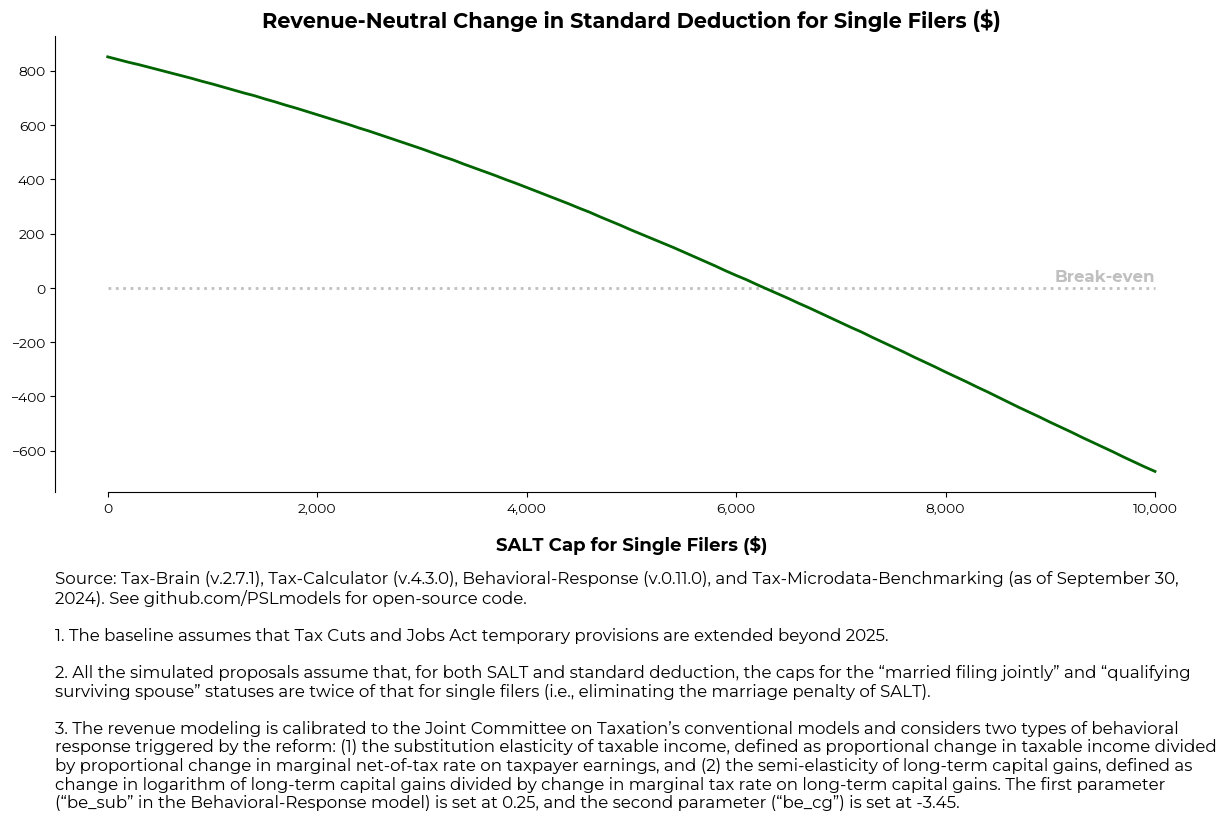

In [7]:
fig, ax = plt.subplots(
    figsize=(12, 8)
)  # This sets the figure size to 6 inches wide by 5 inches high

# Define font sizes
SIZE_DEFAULT = 14
SIZE_LARGE = 16
# plt.rc("font", family="Roboto")  # controls default font
# plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels=

# Define a nice color palette:
# colors = ["#2B2F42", "#8D99AE", "#EF233C"]

# Plot the baseline
# ax.plot([x[0], max(x)], [baseline, baseline], label="Revenue Neutral")
ax.plot(
    [x[0], max(x)],
    [baseline, baseline],
    color="silver",
    linestyle=":",
    linewidth=2
)
ax.text(
    max(x),
    baseline+0.01*max(y),
    "Break-even\n",
    color="silver",
    # fontweight="bold",
    horizontalalignment="right",
    verticalalignment="center",
    size=12,
    font=montserrat_bold
)

# Plot the three model lines

ax.plot(x, y, label=label, color="darkgreen", linewidth=2)

# for i, label in enumerate(labels):
#     if label=='Small':
#         ax.plot(x, y[i], label=label, color=colors[i], linewidth=2)
#         v_adjust = 0.008
#     elif label=='Large':
#         ax.plot(x, y[i], label=label, color=colors[i], linewidth=2)
#         v_adjust = -0.004
#     else:
#         ax.plot(x, y[i], label=label, color=colors[i], linewidth=2, linestyle="--")
#         v_adjust = 0.002
#     ax.text(
#         x[0]-1,
#         y[i][0]+v_adjust,
#         label,
#         color=colors[i],
#         # fontweight="bold",
#         horizontalalignment="right",
#         verticalalignment="center",
#         size=12,
#         font=montserrat
#     )

# ax.text(
#     x[0]-1,
#     y[0][0]+0.022,
#     'Behavioral response',
#     # color=colors[i],
#     fontweight="bold",
#     horizontalalignment="right",
#     verticalalignment="center",
#     size=11,
#     font=montserrat
# )

# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(True)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position("left")
# ax.yaxis.tick_right()
ax.xaxis.set_ticks_position("bottom")
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.spines["bottom"].set_bounds(min(x), max(x))

ax.set_xlabel("SALT Cap for Single Filers ($)", labelpad=15, font=montserrat_bold, size=13)
ax.set_title("Revenue-Neutral Change in Standard Deduction for Single Filers ($)", font=montserrat_bold, size=15)
# ax.legend()
# plt.show()

for tick in ax.get_xticklabels():
    tick.set_fontproperties(montserrat)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(montserrat)

plt.subplots_adjust(left=0.04, right=1, top=0.97, bottom=0.4)

ax.text(0, -0.13, """
Source: Tax-Brain (v.2.7.1), Tax-Calculator (v.4.3.0), Behavioral-Response (v.0.11.0), and Tax-Microdata-Benchmarking (as of September 30, 2024). See github.com/PSLmodels for open-source code.\n
1. The baseline assumes that Tax Cuts and Jobs Act temporary provisions are extended beyond 2025.\n
2. All the simulated proposals assume that, for both SALT and standard deduction, the caps for the “married filing jointly” and “qualifying surviving spouse” statuses are twice of that for single filers (i.e., eliminating the marriage penalty of SALT).\n
3. The revenue modeling is calibrated to the Joint Committee on Taxation’s conventional models and considers two types of behavioral response triggered by the reform: (1) the substitution elasticity of taxable income, defined as proportional change in taxable income divided by proportional change in marginal net-of-tax rate on taxpayer earnings, and (2) the semi-elasticity of long-term capital gains, defined as change in logarithm of long-term capital gains divided by change in marginal tax rate on long-term capital gains. The first parameter (“be_sub” in the Behavioral-Response model) is set at 0.25, and the second parameter (“be_cg”) is set at -3.45.
""", font=montserrat, fontsize=12, horizontalalignment='left', verticalalignment='top', wrap=True, transform=ax.transAxes)

fig.patch.set_alpha(0.0)
fig.savefig("salt_sd_results/figure.png", dpi=300)